In [2]:
import pandas as pd
# Open the documents
ISO_results = pd.read_excel(r"Isotope_herbarium_results_21102024.xlsx") #245 obs. These data are already cleaned. Average of double lines but the observations of Katja are still here.
elev_time = pd.read_excel("bioweb_21102024.xlsx") # Document to add the elevation data. This data is already cleaned.

## adding elevations and collection years
elev = pd.read_csv("All_herbariums_elev_category.csv") #My own analysis from Bioweb not actualized. Some samples missing


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

In [5]:
len(ISO_results) #245
len(elev_time) #612

610

In [6]:
ISO_results.head(3)

,Unnamed: 0,sample-ID,[C] m/m (%),δ13C (‰ v.s. V-PDB),code_box,qcazNemonico,run info,run info.1
0,0,132267,0.434498,-31.56,G72,QCA132267,seq2,20240621.0
1,1,132278,0.368897,-29.03,G88,QCA132278,seq2,20240621.0
2,2,133940,0.497567,-24.28,G71,QCA133940,seq2,20240621.0


In [7]:
merged = pd.merge(ISO_results,elev_time, how= "inner", left_on="qcazNemonico", right_on="numeroMuseo" )
# 7 samples lost because they are not in the registers so they were looked manually, the info is on my collection excel. :).
# #QCA20391.b

merged.to_excel("explore.xlsx")
len(merged) #243

243

In [8]:
merged.head(3)

,Unnamed: 0_x,sample-ID,[C] m/m (%),δ13C (‰ v.s. V-PDB),code_box,qcazNemonico,run info,run info.1,Unnamed: 0_y,numeroMuseo,altitudMax,altitudMin,fechaInicioColeccion,genero,especie,latitude,longitude,year,decade,elev_category
0,0,132267,0.434498,-31.56,G72,QCA132267,seq2,20240621.0,54,QCA132267,250.0,NaN,1985-08-20T00:00:00,Guarea,kunthiana,-1.48333,-76.65,1985.0,1980.0,000-500
1,1,132278,0.368897,-29.03,G88,QCA132278,seq2,20240621.0,65,QCA132278,350.0,NaN,1980-07-10T00:00:00,Guarea,kunthiana,-0.033333,-76.7,1980.0,1980.0,000-500
2,2,133940,0.497567,-24.28,G71,QCA133940,seq2,20240621.0,120,QCA133940,400.0,500.0,1985-06-09T00:00:00,Guarea,kunthiana,0.083333,-79.0333,1985.0,1980.0,000-500


1. Add the lines with data on elevation for the 7 missing samples. DONE
2. Drop the undesired columns in merged. DONE

In [9]:
merged = merged.drop(["Unnamed: 0_x","run info","run info.1","Unnamed: 0_y","altitudMin"], axis=1) #drop undesired column for the final result
merged

,sample-ID,[C] m/m (%),δ13C (‰ v.s. V-PDB),code_box,qcazNemonico,numeroMuseo,altitudMax,fechaInicioColeccion,genero,especie,latitude,longitude,year,decade,elev_category
0,132267,0.434498,-31.56,G72,QCA132267,QCA132267,250.0,1985-08-20T00:00:00,Guarea,kunthiana,-1.48333,-76.65,1985.0,1980.0,000-500
1,132278,0.368897,-29.03,G88,QCA132278,QCA132278,350.0,1980-07-10T00:00:00,Guarea,kunthiana,-0.033333,-76.7,1980.0,1980.0,000-500
2,133940,0.497567,-24.28,G71,QCA133940,QCA133940,400.0,1985-06-09T00:00:00,Guarea,kunthiana,0.083333,-79.0333,1985.0,1980.0,000-500
3,133933,0.496455,-30.19,G86,QCA133933,QCA133933,250.0,1982-10-27T00:00:00,Guarea,kunthiana,-0.383333,-77.0833,1982.0,1980.0,000-500
4,133910,0.386254,-31.17,G84,QCA133910,QCA133910,300.0,1983-10-01T00:00:00,Guarea,kunthiana,-0.533333,-76.3667,1983.0,1980.0,000-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,237501,0.444600,-27.08,a60,QCA237501,QCA237501,1874.0,2013-03-14 00:00:00,Alnus,acuminata,0.0491S,70.7079 W,2013.0,2010.0,1501-2000
239,249210,0.434500,-20.95,a61,QCA249210,QCA249210,2470.0,1979-06-05T00:00:00,Alnus,acuminata,NaN,NaN,1979.0,1970.0,2001-2500
240,216305,0.465800,-26.64,a62,QCA216305,QCA216305,2522.0,2011-08-04T00:00:00,Alnus,acuminata,-2.19417,-78.3558,2011.0,2010.0,2501-3000
241,20462,0.431400,-25.21,a63,QCA20462,QCA20462,3200.0,1984-03-05 00:00:00,Alnus,acuminata,0°10'S,78°50'W,1984.0,1980.0,3001-3500


In [10]:
#merged.groupby(["genero","altitudMax","decade"])["δ13C (‰ v.s. V-PDB)"].mean()
df = merged.groupby(["genero","elev_category","decade"], as_index=False).agg({"δ13C (‰ v.s. V-PDB)": "mean","[C] m/m (%)": "mean","[C] m/m (%)":"count"})
df.to_excel("Summary.xlsx")

# Exploratory graphics

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Water Use Efficiency

In [12]:
#addint the data or Cair
cair = pd.read_csv("co2_delta13_data.csv") # reads the data of CO2 that was calculated and obtained from formulas.
iWUE = pd.merge(merged, cair, left_on="year",right_on="year") #the merged df and the air are merged
iWUE


,sample-ID,[C] m/m (%),δ13C (‰ v.s. V-PDB),code_box,qcazNemonico,numeroMuseo,altitudMax,fechaInicioColeccion,genero,especie,latitude,longitude,year,decade,elev_category,?13Cair,Cair_polinomial,Ca_insitu,Cair
0,132267,0.434498,-31.560000,G72,QCA132267,QCA132267,250.0,1985-08-20T00:00:00,Guarea,kunthiana,-1.48333,-76.65,1985.0,1980.0,000-500,-7.645310,345.258041,346.35,346.350000
1,133940,0.497567,-24.280000,G71,QCA133940,QCA133940,400.0,1985-06-09T00:00:00,Guarea,kunthiana,0.083333,-79.0333,1985.0,1980.0,000-500,-7.645310,345.258041,346.35,346.350000
2,64792,0.469137,-30.540000,G62,QCA64792,QCA64792,1800.0,1985-06-29T00:00:00,Guarea,kunthiana,-0.231389,-78.8028,1985.0,1980.0,1501-2000,-7.645310,345.258041,346.35,346.350000
3,132221,0.449193,-28.840000,G60,QCA132221,QCA132221,1800.0,1985-08-26T00:00:00,Guarea,kunthiana,-0.231389,-78.8028,1985.0,1980.0,1501-2000,-7.645310,345.258041,346.35,346.350000
4,132234,0.462760,-29.950000,G75,QCA132234,QCA132234,450.0,1985-05-18T00:00:00,Guarea,kunthiana,-1.06667,-77.6,1985.0,1980.0,000-500,-7.645310,345.258041,346.35,346.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,V64,0.424216,-21.047986,V64,QCA39302,QCA39302,2470.0,1997-01-14T00:00:00,Vallea,stipularis,-3.98333,-79.3,1997.0,1990.0,2001-2500,-7.977342,364.956247,363.88,363.880000
238,20374,0.462900,-25.070000,a38,QCA20374,QCA20374,2780.0,1997-04-20T00:00:00,Alnus,acuminata,-0.383333,-78.4167,1997.0,1990.0,2501-3000,-7.977342,364.956247,363.88,363.880000
239,20370,0.449500,-23.270000,a42,QCA20370,QCA20370,2350.0,1997-04-19T00:00:00,Alnus,acuminata,-0.055226,-78.616877,1997.0,1990.0,2001-2500,-7.977342,364.956247,363.88,363.880000
240,20455,0.430600,-22.650000,a30,QCA20455,QCA20455,2300.0,1940-01-19T00:00:00,Alnus,acuminata,0.016667,-78.4833,1940.0,1940.0,2001-2500,-6.914141,305.095321,NaN,305.095321


In [13]:
def calculate_iWUE(iWUE):

 a= 4.4
 b= 27
 f= 12
 cP = 40
 iWUE["△13C_cell"] = (iWUE["?13Cair"]- iWUE["δ13C (‰ v.s. V-PDB)"])/(1+(iWUE["δ13C (‰ v.s. V-PDB)"]/1000))
 iWUE["Ci"] = (iWUE["Cair"]*(iWUE["△13C_cell"]-a)+f*cP)/(b-a) #all same units %%
 iWUE["Ci/Ca"]= iWUE["Ci"]/iWUE["Cair"] #ratio of intercellular CO₂ concentration (Ci) to ambient CO₂ concentration (Ca)
 iWUE["iWUE (μmol/mol)"] = (iWUE["Cair"]/1.6)*(1-(iWUE["Ci"]/iWUE["Cair"]))

 #Other way to calculate iWUE, gives same result. Bauters formula.
 iWUE["△13C_cell_2"] = (iWUE["?13Cair"]/1000- iWUE["δ13C (‰ v.s. V-PDB)"]/1000)/(1+(iWUE["δ13C (‰ v.s. V-PDB)"]/1000))
 iWUE["Ci_2"] = (iWUE["Cair"]*(iWUE["△13C_cell_2"]-a/1000)+(f*cP/1000))/(b/1000-a/1000) #all same units %%
 iWUE["iWUE (μmol/mol)_m2"] = (iWUE["Cair"]/1.6)*(1-(iWUE["Ci_2"]/iWUE["Cair"]))

 #
 iWUE_clean = iWUE[(iWUE["iWUE (μmol/mol)"].notnull())] #filter the empty rows
 iWUE_clean.head(3)
 iWUE_clean.to_csv("test.csv")
 return iWUE_clean

In [14]:
iWUE = calculate_iWUE(iWUE)
iWUE

,sample-ID,[C] m/m (%),δ13C (‰ v.s. V-PDB),code_box,qcazNemonico,numeroMuseo,altitudMax,fechaInicioColeccion,genero,especie,...,Cair_polinomial,Ca_insitu,Cair,△13C_cell,Ci,Ci/Ca,iWUE (μmol/mol),△13C_cell_2,Ci_2,iWUE (μmol/mol)_m2
0,132267,0.434498,-31.560000,G72,QCA132267,QCA132267,250.0,1985-08-20T00:00:00,Guarea,kunthiana,...,345.258041,346.35,346.350000,24.694033,332.249487,0.959288,8.812821,0.024694,332.249487,8.812821
1,133940,0.497567,-24.280000,G71,QCA133940,QCA133940,400.0,1985-06-09T00:00:00,Guarea,kunthiana,...,345.258041,346.35,346.350000,17.048630,215.081995,0.620996,82.042503,0.017049,215.081995,82.042503
2,64792,0.469137,-30.540000,G62,QCA64792,QCA64792,1800.0,1985-06-29T00:00:00,Guarea,kunthiana,...,345.258041,346.35,346.350000,23.615920,315.727159,0.911584,19.139276,0.023616,315.727159,19.139276
3,132221,0.449193,-28.840000,G60,QCA132221,QCA132221,1800.0,1985-08-26T00:00:00,Guarea,kunthiana,...,345.258041,346.35,346.350000,21.824096,288.267071,0.832300,36.301831,0.021824,288.267071,36.301831
4,132234,0.462760,-29.950000,G75,QCA132234,QCA132234,450.0,1985-05-18T00:00:00,Guarea,kunthiana,...,345.258041,346.35,346.350000,22.993340,306.185988,0.884036,25.102508,0.022993,306.185988,25.102508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,V64,0.424216,-21.047986,V64,QCA39302,QCA39302,2470.0,1997-01-14T00:00:00,Vallea,stipularis,...,364.956247,363.88,363.880000,13.351670,165.368746,0.454460,124.069534,0.013352,165.368746,124.069534
238,20374,0.462900,-25.070000,a38,QCA20374,QCA20374,2780.0,1997-04-20T00:00:00,Alnus,acuminata,...,364.956247,363.88,363.880000,17.532190,232.678825,0.639438,82.000734,0.017532,232.678825,82.000734
239,20370,0.449500,-23.270000,a42,QCA20370,QCA20370,2350.0,1997-04-19T00:00:00,Alnus,acuminata,...,364.956247,363.88,363.880000,15.656997,202.486547,0.556465,100.870908,0.015657,202.486547,100.870908
240,20455,0.430600,-22.650000,a30,QCA20455,QCA20455,2300.0,1940-01-19T00:00:00,Alnus,acuminata,...,305.095321,NaN,305.095321,16.100537,179.193760,0.587337,78.688476,0.016101,179.193760,78.688476


In [15]:
#especies
iWUE.groupby(["genero"])["[C] m/m (%)"].agg("count")

genero
Alnus      62
Guarea     85
Myrsine    32
Vallea     63
Name: [C] m/m (%), dtype: int64

In [16]:
df_filtrado = iWUE[iWUE['iWUE (μmol/mol)'] >= 1]


In [17]:
iWUE = df_filtrado
iWUE.groupby(["decade","genero","altitudMax"])[["[C] m/m (%)","δ13C (‰ v.s. V-PDB)"]].agg("mean","count")

[C] m/m (%)  δ13C (‰ v.s. V-PDB)
decade genero altitudMax                                  
1930.0 Alnus  3000.0         0.419800           -25.470000
       Vallea 3400.0         0.438596           -26.937751
1940.0 Alnus  2300.0         0.430600           -22.650000
1960.0 Vallea 2800.0         0.414376           -25.683182
              3000.0         0.435194           -22.743897
...                               ...                  ...
2010.0 Vallea 2600.0         0.435182           -29.129741
              2833.0         0.424526           -27.485701
              3000.0         0.447306           -27.352522
              3100.0         0.437103           -26.316927
              3300.0         0.427755           -26.872572

[191 rows x 2 columns]

In [18]:
def create_plots(merged,variable):
 """merged = df,
    " variable = 'δ13C (‰ v.s. V-PDB)', "iWUE (μmol/mol)"""

 # Create a figure with 3 subplots (1 row, 3 columns)
 fig, axes = plt.subplots(1, 4, figsize=(15, 5))

 # Generate the first plot in the first subplot
 sns.regplot(x="year", y=variable,data=merged,line_kws={'color': "blue"},ax=axes[0]) #graphc for all samples.
 sns.scatterplot(x="year", y=variable, data=merged, hue="genero", palette="deep", ax=axes[0])# style="elev_category"
 axes[0].set_title('Plot A')
 axes[0].annotate('A', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold')

 # Generate the second plot in the second subplot
 desired_order = ['000-500', '501-1000', '1001-1500', '1501-2000',"2001-2500","2501-3000","3001-3500","3500 "]
 b = sns.boxplot(x="elev_category", y=variable, data=merged,
                order=desired_order, ax=axes[1],
                color="white",  # Sets the boxplot color to white
                boxprops=dict(facecolor='white', edgecolor='black'),  # Box color
                whiskerprops=dict(color='black'),  # Whisker color
                capprops=dict(color='black'),  # Caps color
                medianprops=dict(color='black'))  # Median line color

 # Rotate x-axis labels
 axes[1].set_xticklabels(b.get_xticklabels(), rotation=90)

 # Overlay the dots using a stripplot (with jitter) or swarmplot
 sns.stripplot(x="elev_category", y=variable, data=merged,
              hue="genero",  # Replace with your group column name
              dodge=True,  # To avoid overlapping within categories
              jitter=True,  # Adds some horizontal displacement to avoid overplotting
              palette="deep",  # Choose a color palette for the dots
              ax=axes[1],
              alpha=0.7)  # Adjust the transparency of the dots

 # Optionally, add a legend for the colors (dots)
 axes[1].legend(title="Group")
 axes[1].set_title('Plot B')
 axes[1].annotate('B', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold')


 #  Create a neutral boxplot for 'Plot C'
 c = sns.boxplot(x="decade", y=variable, data=merged,
                ax=axes[2],
                color="white",  # Set the boxplot color to white
                boxprops=dict(facecolor='white', edgecolor='black'),  # Box color
                whiskerprops=dict(color='black'),  # Whisker color
                capprops=dict(color='black'),  # Cap color
                medianprops=dict(color='black'))  # Median line color

 # Overlay the dots using a stripplot or swarmplot with color by group
 sns.stripplot(x="decade", y=variable, data=merged,
              hue="genero",  # Replace with your group column
              dodge=True,  # Separate dots by hue within categories
              jitter=True,  # Slightly spread the dots to avoid overplotting
              palette="deep",  # Choose a color palette for the dots
              ax=axes[2],
              alpha=0.7)  # Transparency of the dots

 # Add title and annotation for 'Plot C'
 axes[2].set_title('Plot C')
 axes[2].annotate('C', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold')
 axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
 # Optionally, add a legend for the dots (colored by group)
 axes[2].legend(title="Group")


 g = sns.regplot(x="altitudMax", y=variable,data=merged,line_kws={'color':'red'},ax=axes[3]) #graphc for all samples.
 axes[3].legend(title="Group")

 # Adjust layout
 plt.tight_layout()

 # Show the figure
 return plt.show()


C:\Users\Andrea\AppData\Local\Temp\ipykernel_28656\1996065193.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(b.get_xticklabels(), rotation=90)
C:\Users\Andrea\AppData\Local\Temp\ipykernel_28656\1996065193.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


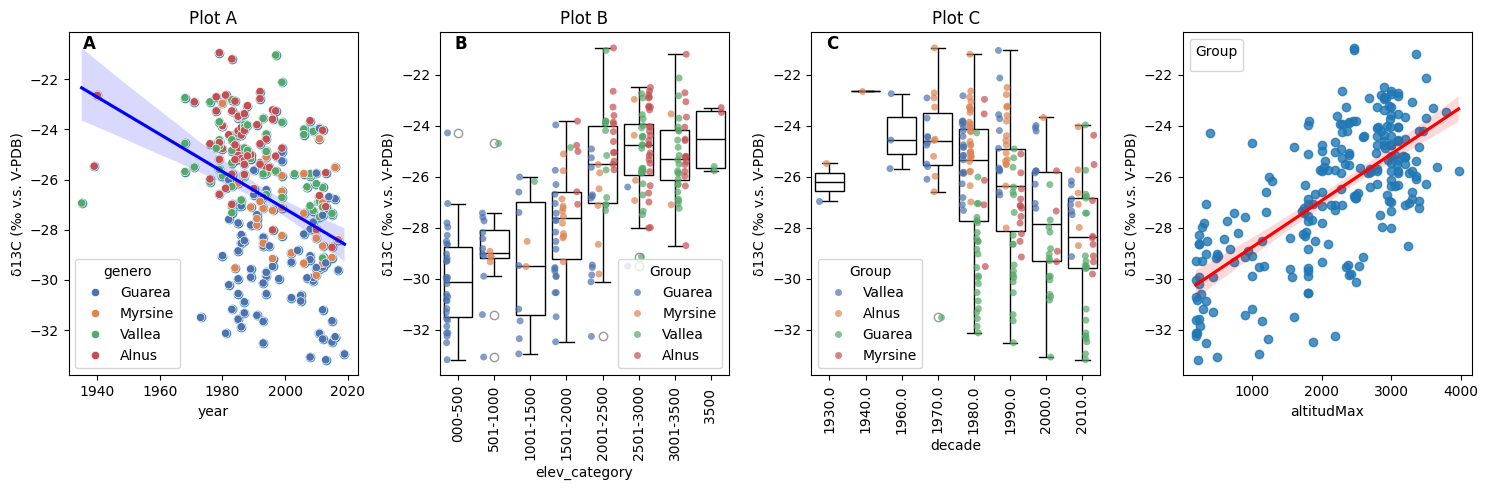

In [19]:
create_plots(iWUE,"δ13C (‰ v.s. V-PDB)")

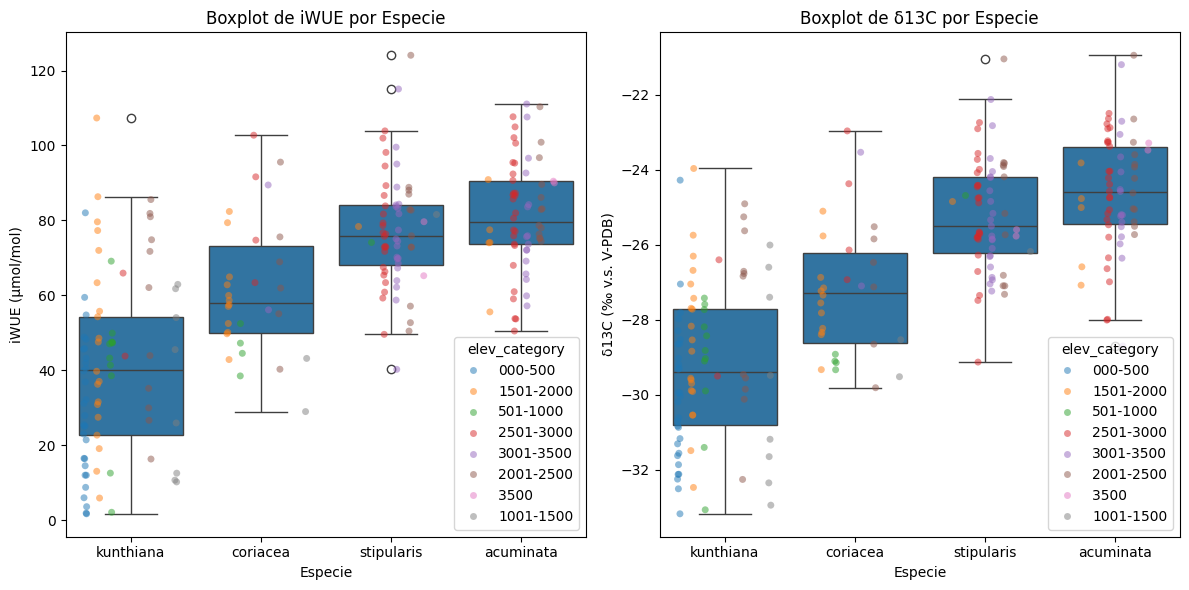

In [20]:
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.boxplot(data=iWUE, x='especie', y='iWUE (μmol/mol)')
sns.stripplot(data=iWUE, x='especie', y='iWUE (μmol/mol)', hue='elev_category', alpha=0.5, dodge=True)  # Puntos según categoría
plt.title('Boxplot de iWUE por Especie')
plt.xlabel('Especie')
plt.ylabel('iWUE (μmol/mol)')

# Crear un boxplot para 'δ13C (‰ v.s. V-PDB)'
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
sns.boxplot(data=iWUE, x='especie', y='δ13C (‰ v.s. V-PDB)')
sns.stripplot(data=iWUE, x='especie', y='δ13C (‰ v.s. V-PDB)', hue="elev_category", alpha=0.5, dodge=True)  # Puntos según categoría
plt.title('Boxplot de δ13C por Especie')
plt.xlabel('Especie')
plt.ylabel('δ13C (‰ v.s. V-PDB)')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para que no se superpongan
plt.show()

C:\Users\Andrea\AppData\Local\Temp\ipykernel_28656\1996065193.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(b.get_xticklabels(), rotation=90)
C:\Users\Andrea\AppData\Local\Temp\ipykernel_28656\1996065193.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


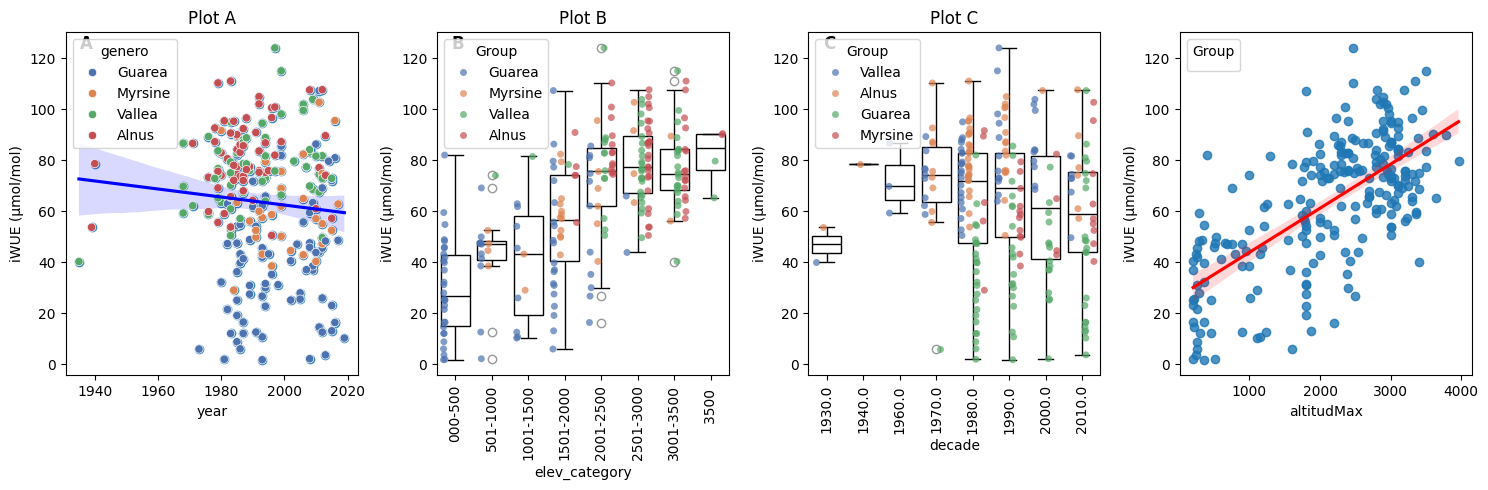

In [21]:
create_plots(iWUE,"iWUE (μmol/mol)")

In [22]:
### create a dataframe with number per elevation, year, 

In [23]:
desired_order = ['000-500', '501-1000', '1001-1500', '1501-2000',"2001-2500","2501-3000","3001-3500","3500 "]
g = sns.lmplot(data=iWUE, x="year", y='iWUE (μmol/mol)', hue="especie", col="elev_category",col_order= desired,col_wrap=3,sharex=False, sharey=False,fit_reg=True)
g.set_xticklabels(rotation=90)


NameError: name 'desired' is not defined

c:\Users\Andrea\.conda\envs\herb_env\lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\Andrea\.conda\envs\herb_env\lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


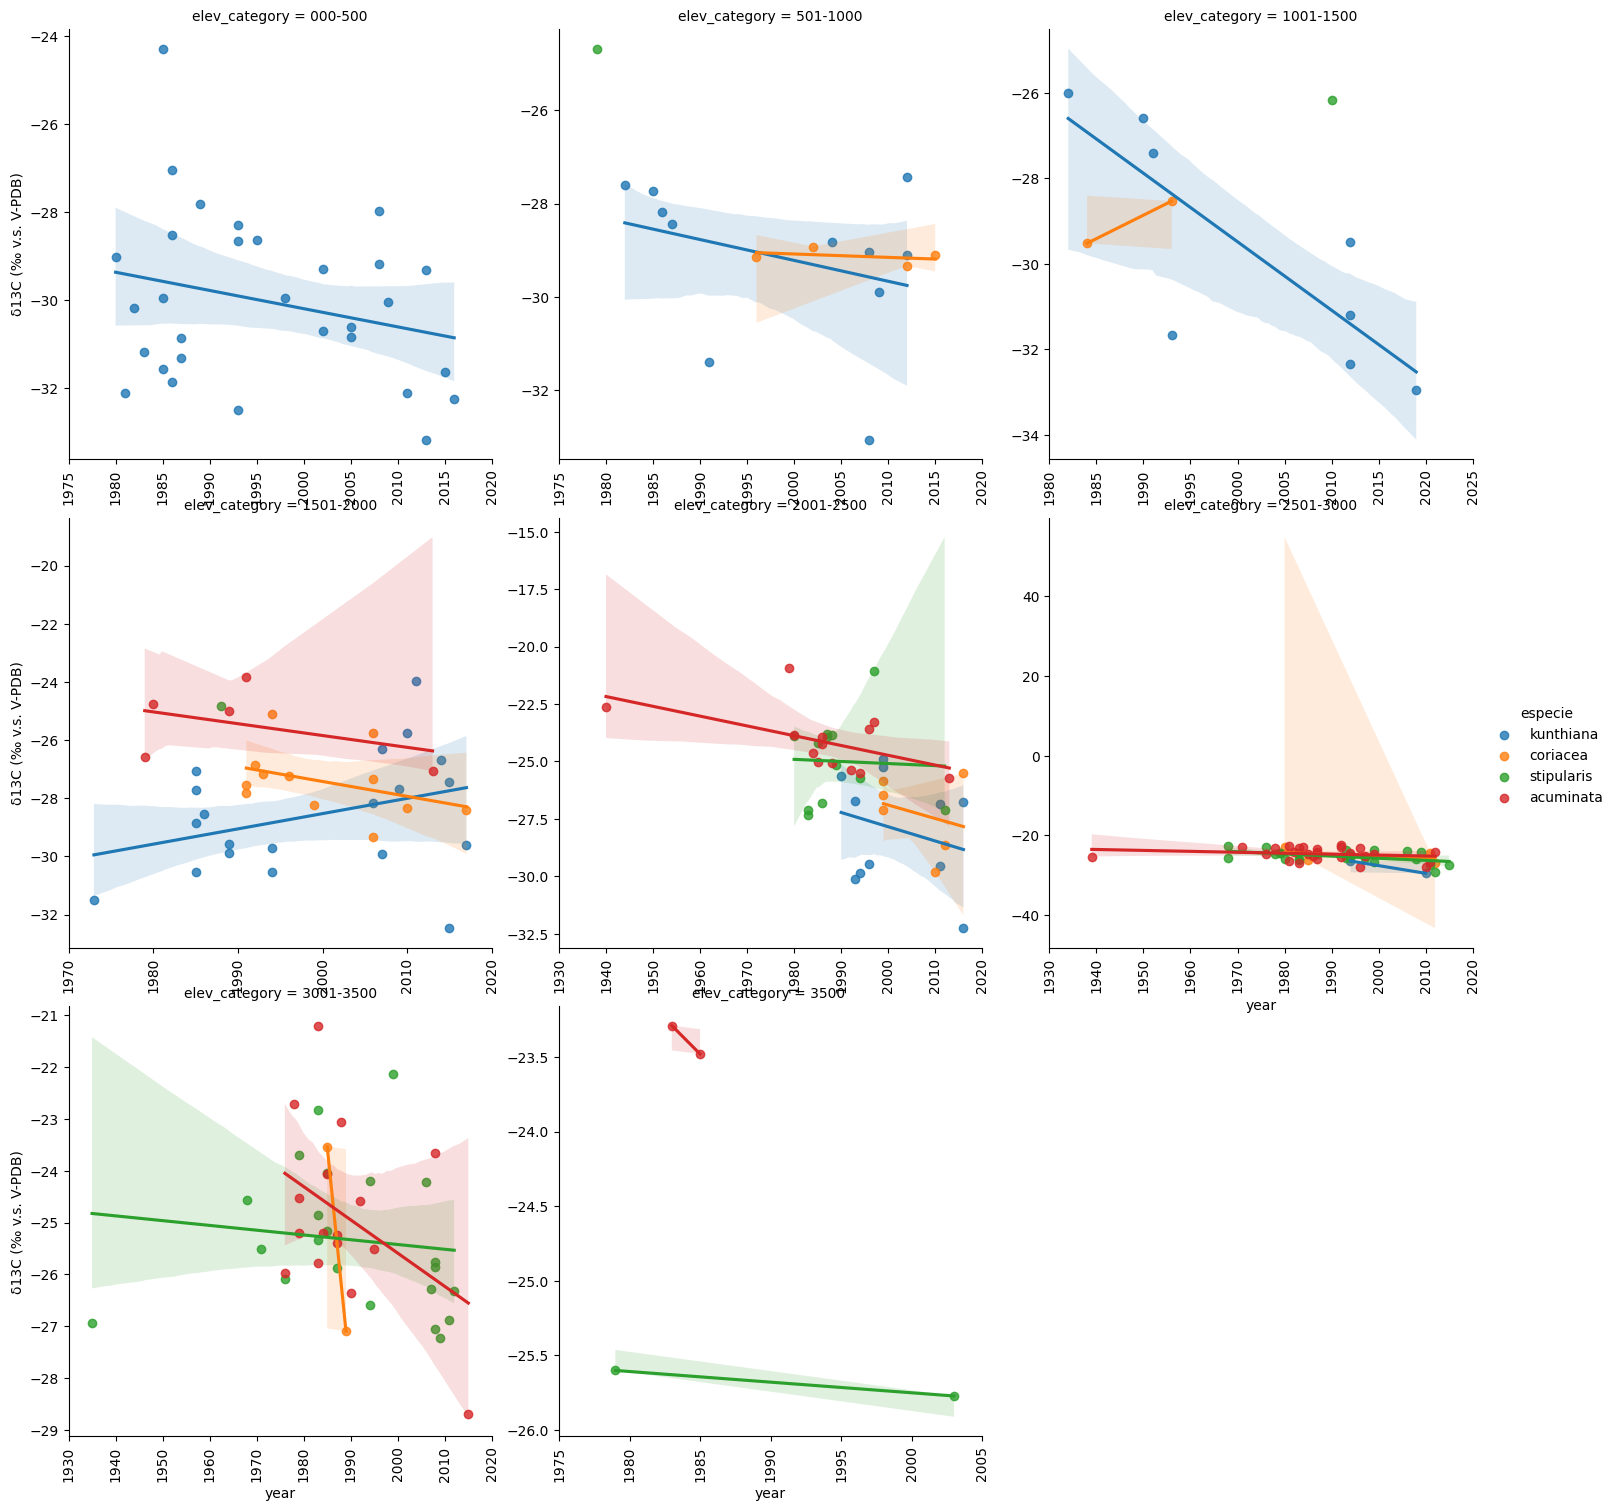

In [72]:
desired_order = ['000-500', '501-1000', '1001-1500', '1501-2000',"2001-2500","2501-3000","3001-3500","3500 "]
g = sns.lmplot(data=iWUE, x="year", y="δ13C (‰ v.s. V-PDB)", hue="especie", col="elev_category",col_order= desired_order,col_wrap=3,sharex=False, sharey=False,fit_reg=True)
g.set_xticklabels(rotation=90)